# Matching nomba_gtb_fsp to nomba_gtb_backend
* Only those with the reference tag "bills and payments" are matched

In [120]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

import fuzzymatcher
import re

nomba_gtb_fsp = pd.read_csv('Nomba_GTB_BILLS - fsp_16_mar_2024_31_mar_2024.csv')

#nomba_gtb_fsp = pd.read_csv('Nomba_GTB_BILLS - fsp_16_mar_2024_31_mar_2024.csv')
nomba_gtb_backend = pd.read_csv('Nomba_GTB_BILLS - Backend_1_Mar_2024_31_2024.csv')




In [64]:
#nomba_gtb_backend

In [65]:
nomba_gtb_fsp

,id_fsp,transaction_date_fsp,value_date,transaction_type,amount_fsp,amount_currency,balance,balance_currency,matching_reference,reporting_tag,...,updated,fsp_accounts,fsp_transaction_ids,backend_accounts,backend_transaction_ids,other_accounts,other_transaction_ids,metadata,tags,description
0,493527019,2024-03-24,2024-03-24 00:00:00.000000 UTC,D,400.00,NGN,23387956.15,NGN,"[3@3622512813388183, 3@3622512813388183400.00]",bill_payments,...,2024-05-16 15:46:34.000000 UTC,NaN,NaN,[136],[684757099],NaN,NaN,"{transaction_date=2024-03-24 00:00:00, origina...",[bill_payments],D | TRANSFER BETWEEN CUSTOMERS BillsPayment Pa...
1,493530399,2024-03-29,2024-03-29 00:00:00.000000 UTC,D,100.00,NGN,22723019.15,NGN,"[3@4122389416478862100.00, 3@4122389416478862]",bill_payments,...,2024-05-16 15:46:34.000000 UTC,NaN,NaN,[136],[684756545],NaN,NaN,"{transaction_date=2024-03-29 00:00:00, origina...",[bill_payments],D | TRANSFER BETWEEN CUSTOMERS BillsPayment Pa...
2,493531321,2024-03-30,2024-03-30 00:00:00.000000 UTC,D,1000.00,NGN,17587584.15,NGN,"[3@1332568146768148, 3@13325681467681481000.00]",bill_payments,...,2024-05-16 15:46:34.000000 UTC,NaN,NaN,[136],[684759010],NaN,NaN,"{transaction_date=2024-03-30 00:00:00, origina...",[bill_payments],D | TRANSFER BETWEEN CUSTOMERS BillsPayment Pa...
3,493523573,2024-03-17,2024-03-17 00:00:00.000000 UTC,D,1000.00,NGN,22078736.15,NGN,"[3@7321192357487326, 3@73211923574873261000.00]",bill_payments,...,2024-05-16 15:46:34.000000 UTC,NaN,NaN,[136],[684760491],NaN,NaN,"{transaction_date=2024-03-17 00:00:00, origina...",[bill_payments],D | TRANSFER BETWEEN CUSTOMERS BillsPayment Pa...
4,493526877,2024-03-23,2024-03-23 00:00:00.000000 UTC,D,500.00,NGN,24417139.15,NGN,"[3@2291774841227371500.00, 3@2291774841227371]",bill_payments,...,2024-05-16 15:46:34.000000 UTC,NaN,NaN,[136],[684758199],NaN,NaN,"{transaction_date=2024-03-23 00:00:00, origina...",[bill_payments],D | TRANSFER BETWEEN CUSTOMERS BillsPayment Pa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10625,493532512,2024-03-31,2024-03-31 00:00:00.000000 UTC,D,25.00,NGN,12739233.15,NGN,"[3@2729785645691423, 3@272978564569142325.00]",fees_and_commissions,...,2024-05-16 15:45:31.230716 UTC,NaN,NaN,NaN,NaN,NaN,NaN,"{transaction_date=2024-03-31 00:00:00, origina...",[fees_and_commissions],D | COMMISSION BillsPayment Payment Charge1 vi...
10626,493532514,2024-03-31,2024-03-31 00:00:00.000000 UTC,D,25.00,NGN,12724208.15,NGN,"[3@842262142923286825.00, 3@8422621429232868]",fees_and_commissions,...,2024-05-16 15:45:31.230716 UTC,NaN,NaN,NaN,NaN,NaN,NaN,"{transaction_date=2024-03-31 00:00:00, origina...",[fees_and_commissions],D | COMMISSION BillsPayment Payment Charge1 vi...
10627,493532516,2024-03-31,2024-03-31 00:00:00.000000 UTC,D,25.00,NGN,12709183.15,NGN,"[3@369436493293619825.00, 3@3694364932936198]",fees_and_commissions,...,2024-05-16 15:45:31.230716 UTC,NaN,NaN,NaN,NaN,NaN,NaN,"{transaction_date=2024-03-31 00:00:00, origina...",[fees_and_commissions],D | COMMISSION BillsPayment Payment Charge1 vi...
10628,493532517,2024-03-31,2024-03-31 00:00:00.000000 UTC,D,25320.70,NGN,12683862.45,NGN,NaN,fees_and_commissions,...,2024-05-16 15:45:31.230716 UTC,NaN,NaN,NaN,NaN,NaN,NaN,"{transaction_date=2024-03-31 00:00:00, origina...","[no_ref, fees_and_commissions]",D | ACCOUNT MAINTENANCE CHARGE


Extracting the number from description in backend

In [66]:
nomba_gtb_backend['description_number'] = nomba_gtb_backend['description'].str.split('/').str[0]

In [67]:
nomba_gtb_fsp

,id_fsp,transaction_date_fsp,value_date,transaction_type,amount_fsp,amount_currency,balance,balance_currency,matching_reference,reporting_tag,...,updated,fsp_accounts,fsp_transaction_ids,backend_accounts,backend_transaction_ids,other_accounts,other_transaction_ids,metadata,tags,description
0,493527019,2024-03-24,2024-03-24 00:00:00.000000 UTC,D,400.00,NGN,23387956.15,NGN,"[3@3622512813388183, 3@3622512813388183400.00]",bill_payments,...,2024-05-16 15:46:34.000000 UTC,NaN,NaN,[136],[684757099],NaN,NaN,"{transaction_date=2024-03-24 00:00:00, origina...",[bill_payments],D | TRANSFER BETWEEN CUSTOMERS BillsPayment Pa...
1,493530399,2024-03-29,2024-03-29 00:00:00.000000 UTC,D,100.00,NGN,22723019.15,NGN,"[3@4122389416478862100.00, 3@4122389416478862]",bill_payments,...,2024-05-16 15:46:34.000000 UTC,NaN,NaN,[136],[684756545],NaN,NaN,"{transaction_date=2024-03-29 00:00:00, origina...",[bill_payments],D | TRANSFER BETWEEN CUSTOMERS BillsPayment Pa...
2,493531321,2024-03-30,2024-03-30 00:00:00.000000 UTC,D,1000.00,NGN,17587584.15,NGN,"[3@1332568146768148, 3@13325681467681481000.00]",bill_payments,...,2024-05-16 15:46:34.000000 UTC,NaN,NaN,[136],[684759010],NaN,NaN,"{transaction_date=2024-03-30 00:00:00, origina...",[bill_payments],D | TRANSFER BETWEEN CUSTOMERS BillsPayment Pa...
3,493523573,2024-03-17,2024-03-17 00:00:00.000000 UTC,D,1000.00,NGN,22078736.15,NGN,"[3@7321192357487326, 3@73211923574873261000.00]",bill_payments,...,2024-05-16 15:46:34.000000 UTC,NaN,NaN,[136],[684760491],NaN,NaN,"{transaction_date=2024-03-17 00:00:00, origina...",[bill_payments],D | TRANSFER BETWEEN CUSTOMERS BillsPayment Pa...
4,493526877,2024-03-23,2024-03-23 00:00:00.000000 UTC,D,500.00,NGN,24417139.15,NGN,"[3@2291774841227371500.00, 3@2291774841227371]",bill_payments,...,2024-05-16 15:46:34.000000 UTC,NaN,NaN,[136],[684758199],NaN,NaN,"{transaction_date=2024-03-23 00:00:00, origina...",[bill_payments],D | TRANSFER BETWEEN CUSTOMERS BillsPayment Pa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10625,493532512,2024-03-31,2024-03-31 00:00:00.000000 UTC,D,25.00,NGN,12739233.15,NGN,"[3@2729785645691423, 3@272978564569142325.00]",fees_and_commissions,...,2024-05-16 15:45:31.230716 UTC,NaN,NaN,NaN,NaN,NaN,NaN,"{transaction_date=2024-03-31 00:00:00, origina...",[fees_and_commissions],D | COMMISSION BillsPayment Payment Charge1 vi...
10626,493532514,2024-03-31,2024-03-31 00:00:00.000000 UTC,D,25.00,NGN,12724208.15,NGN,"[3@842262142923286825.00, 3@8422621429232868]",fees_and_commissions,...,2024-05-16 15:45:31.230716 UTC,NaN,NaN,NaN,NaN,NaN,NaN,"{transaction_date=2024-03-31 00:00:00, origina...",[fees_and_commissions],D | COMMISSION BillsPayment Payment Charge1 vi...
10627,493532516,2024-03-31,2024-03-31 00:00:00.000000 UTC,D,25.00,NGN,12709183.15,NGN,"[3@369436493293619825.00, 3@3694364932936198]",fees_and_commissions,...,2024-05-16 15:45:31.230716 UTC,NaN,NaN,NaN,NaN,NaN,NaN,"{transaction_date=2024-03-31 00:00:00, origina...",[fees_and_commissions],D | COMMISSION BillsPayment Payment Charge1 vi...
10628,493532517,2024-03-31,2024-03-31 00:00:00.000000 UTC,D,25320.70,NGN,12683862.45,NGN,NaN,fees_and_commissions,...,2024-05-16 15:45:31.230716 UTC,NaN,NaN,NaN,NaN,NaN,NaN,"{transaction_date=2024-03-31 00:00:00, origina...","[no_ref, fees_and_commissions]",D | ACCOUNT MAINTENANCE CHARGE


Extracting the number from description in fsp using the import re

In [68]:
def extract_fsp_description_number(text):
    match = re.search(r'TP-COSMIC\s+(\d+)', text)
    return match.group(1) if match else None


nomba_gtb_fsp['description_number_fsp'] = nomba_gtb_fsp['description'].apply(extract_fsp_description_number)
nomba_gtb_fsp

,id_fsp,transaction_date_fsp,value_date,transaction_type,amount_fsp,amount_currency,balance,balance_currency,matching_reference,reporting_tag,...,fsp_accounts,fsp_transaction_ids,backend_accounts,backend_transaction_ids,other_accounts,other_transaction_ids,metadata,tags,description,description_number_fsp
0,493527019,2024-03-24,2024-03-24 00:00:00.000000 UTC,D,400.00,NGN,23387956.15,NGN,"[3@3622512813388183, 3@3622512813388183400.00]",bill_payments,...,NaN,NaN,[136],[684757099],NaN,NaN,"{transaction_date=2024-03-24 00:00:00, origina...",[bill_payments],D | TRANSFER BETWEEN CUSTOMERS BillsPayment Pa...,3622512813388183
1,493530399,2024-03-29,2024-03-29 00:00:00.000000 UTC,D,100.00,NGN,22723019.15,NGN,"[3@4122389416478862100.00, 3@4122389416478862]",bill_payments,...,NaN,NaN,[136],[684756545],NaN,NaN,"{transaction_date=2024-03-29 00:00:00, origina...",[bill_payments],D | TRANSFER BETWEEN CUSTOMERS BillsPayment Pa...,4122389416478862
2,493531321,2024-03-30,2024-03-30 00:00:00.000000 UTC,D,1000.00,NGN,17587584.15,NGN,"[3@1332568146768148, 3@13325681467681481000.00]",bill_payments,...,NaN,NaN,[136],[684759010],NaN,NaN,"{transaction_date=2024-03-30 00:00:00, origina...",[bill_payments],D | TRANSFER BETWEEN CUSTOMERS BillsPayment Pa...,1332568146768148
3,493523573,2024-03-17,2024-03-17 00:00:00.000000 UTC,D,1000.00,NGN,22078736.15,NGN,"[3@7321192357487326, 3@73211923574873261000.00]",bill_payments,...,NaN,NaN,[136],[684760491],NaN,NaN,"{transaction_date=2024-03-17 00:00:00, origina...",[bill_payments],D | TRANSFER BETWEEN CUSTOMERS BillsPayment Pa...,7321192357487326
4,493526877,2024-03-23,2024-03-23 00:00:00.000000 UTC,D,500.00,NGN,24417139.15,NGN,"[3@2291774841227371500.00, 3@2291774841227371]",bill_payments,...,NaN,NaN,[136],[684758199],NaN,NaN,"{transaction_date=2024-03-23 00:00:00, origina...",[bill_payments],D | TRANSFER BETWEEN CUSTOMERS BillsPayment Pa...,2291774841227371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10625,493532512,2024-03-31,2024-03-31 00:00:00.000000 UTC,D,25.00,NGN,12739233.15,NGN,"[3@2729785645691423, 3@272978564569142325.00]",fees_and_commissions,...,NaN,NaN,NaN,NaN,NaN,NaN,"{transaction_date=2024-03-31 00:00:00, origina...",[fees_and_commissions],D | COMMISSION BillsPayment Payment Charge1 vi...,2729785645691423
10626,493532514,2024-03-31,2024-03-31 00:00:00.000000 UTC,D,25.00,NGN,12724208.15,NGN,"[3@842262142923286825.00, 3@8422621429232868]",fees_and_commissions,...,NaN,NaN,NaN,NaN,NaN,NaN,"{transaction_date=2024-03-31 00:00:00, origina...",[fees_and_commissions],D | COMMISSION BillsPayment Payment Charge1 vi...,8422621429232868
10627,493532516,2024-03-31,2024-03-31 00:00:00.000000 UTC,D,25.00,NGN,12709183.15,NGN,"[3@369436493293619825.00, 3@3694364932936198]",fees_and_commissions,...,NaN,NaN,NaN,NaN,NaN,NaN,"{transaction_date=2024-03-31 00:00:00, origina...",[fees_and_commissions],D | COMMISSION BillsPayment Payment Charge1 vi...,3694364932936198
10628,493532517,2024-03-31,2024-03-31 00:00:00.000000 UTC,D,25320.70,NGN,12683862.45,NGN,NaN,fees_and_commissions,...,NaN,NaN,NaN,NaN,NaN,NaN,"{transaction_date=2024-03-31 00:00:00, origina...","[no_ref, fees_and_commissions]",D | ACCOUNT MAINTENANCE CHARGE,None


In [128]:
# Filter for 'bills_payments'
nomba_gtb_fsp_bills_payments = nomba_gtb_fsp[nomba_gtb_fsp['reporting_tag'] == 'bill_payments']
#nomba_gtb_fsp.columns


Reading amount from backend and fsp into the same format (2 decimal places)

In [82]:
nomba_gtb_backend['amount_backend'] = nomba_gtb_backend['amount_backend'].astype(float).map('{:.2f}'.format)
nomba_gtb_fsp_bills_payments['amount_fsp'] = nomba_gtb_fsp_bills_payments['amount_fsp'].astype(float).map('{:.2f}'.format)

nomba_gtb_fsp_bills_payments



/tmp/ipykernel_4720/1066067632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nomba_gtb_fsp_bills_payments['amount_fsp'] = nomba_gtb_fsp_bills_payments['amount_fsp'].astype(float).map('{:.2f}'.format)


,id_fsp,transaction_date_fsp,value_date,transaction_type,amount_fsp,amount_currency,balance,balance_currency,matching_reference,reporting_tag,...,fsp_accounts,fsp_transaction_ids,backend_accounts,backend_transaction_ids,other_accounts,other_transaction_ids,metadata,tags,description,description_number_fsp
0,493527019,2024-03-24,2024-03-24 00:00:00.000000 UTC,D,400.00,NGN,23387956.15,NGN,"[3@3622512813388183, 3@3622512813388183400.00]",bill_payments,...,NaN,NaN,[136],[684757099],NaN,NaN,"{transaction_date=2024-03-24 00:00:00, origina...",[bill_payments],D | TRANSFER BETWEEN CUSTOMERS BillsPayment Pa...,3622512813388183
1,493530399,2024-03-29,2024-03-29 00:00:00.000000 UTC,D,100.00,NGN,22723019.15,NGN,"[3@4122389416478862100.00, 3@4122389416478862]",bill_payments,...,NaN,NaN,[136],[684756545],NaN,NaN,"{transaction_date=2024-03-29 00:00:00, origina...",[bill_payments],D | TRANSFER BETWEEN CUSTOMERS BillsPayment Pa...,4122389416478862
2,493531321,2024-03-30,2024-03-30 00:00:00.000000 UTC,D,1000.00,NGN,17587584.15,NGN,"[3@1332568146768148, 3@13325681467681481000.00]",bill_payments,...,NaN,NaN,[136],[684759010],NaN,NaN,"{transaction_date=2024-03-30 00:00:00, origina...",[bill_payments],D | TRANSFER BETWEEN CUSTOMERS BillsPayment Pa...,1332568146768148
3,493523573,2024-03-17,2024-03-17 00:00:00.000000 UTC,D,1000.00,NGN,22078736.15,NGN,"[3@7321192357487326, 3@73211923574873261000.00]",bill_payments,...,NaN,NaN,[136],[684760491],NaN,NaN,"{transaction_date=2024-03-17 00:00:00, origina...",[bill_payments],D | TRANSFER BETWEEN CUSTOMERS BillsPayment Pa...,7321192357487326
4,493526877,2024-03-23,2024-03-23 00:00:00.000000 UTC,D,500.00,NGN,24417139.15,NGN,"[3@2291774841227371500.00, 3@2291774841227371]",bill_payments,...,NaN,NaN,[136],[684758199],NaN,NaN,"{transaction_date=2024-03-23 00:00:00, origina...",[bill_payments],D | TRANSFER BETWEEN CUSTOMERS BillsPayment Pa...,2291774841227371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5306,493528175,2024-03-26,2024-03-26 00:00:00.000000 UTC,D,700.00,NGN,17214900.15,NGN,"[3@6521887976612188700.00, 3@6521887976612188]",bill_payments,...,NaN,NaN,[136],[684765164],NaN,NaN,"{transaction_date=2024-03-26 00:00:00, origina...",[bill_payments],D | TRANSFER BETWEEN CUSTOMERS BillsPayment Pa...,6521887976612188
5307,493524261,2024-03-19,2024-03-18 00:00:00.000000 UTC,D,10000.00,NGN,29458922.15,NGN,"[3@7427299227914362, 3@742729922791436210000.00]",bill_payments,...,NaN,NaN,[136],[684763878],NaN,NaN,"{transaction_date=2024-03-19 00:00:00, origina...",[bill_payments],D | TRANSFER BETWEEN CUSTOMERS BillsPayment Pa...,7427299227914362
5308,493527339,2024-03-24,2024-03-24 00:00:00.000000 UTC,D,2000.00,NGN,21659746.15,NGN,"[3@67636812336379862000.00, 3@6763681233637986]",bill_payments,...,NaN,NaN,[136],[684760727],NaN,NaN,"{transaction_date=2024-03-24 00:00:00, origina...",[bill_payments],D | TRANSFER BETWEEN CUSTOMERS BillsPayment Pa...,6763681233637986
6423,493524116,2024-03-18,2024-03-18 00:00:00.000000 UTC,D,50000.00,NGN,30192772.15,NGN,"[3@8418967372777283, 3@841896737277728350000.00]",bill_payments,...,NaN,NaN,NaN,NaN,NaN,NaN,"{transaction_date=2024-03-18 00:00:00, origina...",[bill_payments],D | TRANSFER BETWEEN CUSTOMERS BillsPayment Pa...,8418967372777283


In [84]:
left_on =["description_number_fsp","amount_fsp","transaction_date_fsp"]
right_on = ["description_number","amount_backend","transaction_date_backend"]

In [89]:
matched_results = fuzzymatcher.fuzzy_left_join(nomba_gtb_fsp_bills_payments, nomba_gtb_backend, left_on, right_on, left_id_col="id_fsp", right_id_col="id_backend")

In [91]:
cols = ['best_match_score','id_fsp','__id_right','description_number_fsp','description_number','amount_fsp', 'amount_backend', 'transaction_date_fsp', 'transaction_date_backend']
cols

['best_match_score',
 'id_fsp',
 '__id_right',
 'description_number_fsp',
 'description_number',
 'amount_fsp',
 'amount_backend',
 'transaction_date_fsp',
 'transaction_date_backend']

In [94]:
matched_results[cols].sort_values (by=['best_match_score'], ascending=False)

,best_match_score,id_fsp,__id_right,description_number_fsp,description_number,amount_fsp,amount_backend,transaction_date_fsp,transaction_date_backend
23808,0.392442,493524763,684756099,9221943625234538,9221943625234538,910.00,910.00,2024-03-20,2024-03-20
11104,0.392442,493524873,684756097,9891441686565163,9891441686565163,30300.00,30300.00,2024-03-20,2024-03-20
5799,0.392442,493524919,684755457,8168323776572639,8168323776572639,165000.00,165000.00,2024-03-20,2024-03-20
30708,0.392442,493525083,684755639,2556854842842774,2556854842842774,87000.00,87000.00,2024-03-20,2024-03-20
27267,0.392442,493524423,684756251,3954677518531293,3954677518531293,7950.00,7950.00,2024-03-19,2024-03-19
...,...,...,...,...,...,...,...,...,...
13910,0.068988,493524713,684760278,3329773372619127,3329773372619127,1000.00,1000.00,2024-03-20,2024-03-19
6567,0.068988,493524707,684759911,1971378739743599,1971378739743599,1000.00,1000.00,2024-03-20,2024-03-19
21259,0.009939,493531915,684758081,5359546555547529,5379157357962566,5000.00,500.00,2024-03-31,2024-03-31
33622,-0.012691,493524116,684763351,8418967372777283,8496645373891422,50000.00,5000.00,2024-03-18,2024-03-18


Set threshold to account for potential difference in transaction date.

In [97]:
threshold = 0.06

In [109]:
fuzzy_fsp_backend_matches = matched_results.query(f"best_match_score >= {threshold}").sort_values (by=['best_match_score'], ascending=False)

In [116]:
fuzzy_fsp_backend_matches['fuzzy_matched']= 'TRUE'
fuzzy_fsp_backend_matches[cols]

,best_match_score,id_fsp,__id_right,description_number_fsp,description_number,amount_fsp,amount_backend,transaction_date_fsp,transaction_date_backend
23808,0.392442,493524763,684756099,9221943625234538,9221943625234538,910.00,910.00,2024-03-20,2024-03-20
10116,0.392442,493524643,684755122,7194835152357795,7194835152357795,73000.00,73000.00,2024-03-19,2024-03-19
11104,0.392442,493524873,684756097,9891441686565163,9891441686565163,30300.00,30300.00,2024-03-20,2024-03-20
30708,0.392442,493525083,684755639,2556854842842774,2556854842842774,87000.00,87000.00,2024-03-20,2024-03-20
10927,0.392442,493524959,684755449,1914399172658562,1914399172658562,29400.00,29400.00,2024-03-20,2024-03-20
...,...,...,...,...,...,...,...,...,...
17457,0.071417,493524281,684760072,3227225656826656,3227225656826656,1000.00,1000.00,2024-03-19,2024-03-18
5345,0.071417,493524277,684759460,2589754287762726,2589754287762726,1000.00,1000.00,2024-03-19,2024-03-18
25348,0.071417,493524283,684759899,5442972611358173,5442972611358173,1000.00,1000.00,2024-03-19,2024-03-18
6567,0.068988,493524707,684759911,1971378739743599,1971378739743599,1000.00,1000.00,2024-03-20,2024-03-19


##PLOT MATCHED AND FUZZY MATCHED RECORDS IN FSP

only included are the "bills and payments" while excluding "fees and commissions"


In [125]:
# Count the number of TRUE values in the 'matched' column for both DataFrames
count_bills_payment_matched_true = nomba_gtb_fsp[nomba_gtb_fsp['matched'] == True].shape[0]
count_backend_matches_matched_true = fuzzy_fsp_backend_matches[fuzzy_fsp_backend_matches['matched_left'] == True].shape[0]

print("MATCHED COUNT = ", count_bills_payment_matched_true)
print("FUZZY COUNT = ", count_backend_matches_matched_true)   

MATCHED COUNT =  5309
FUZZY COUNT =  5308


In [126]:
# Create a DataFrame for plotting
data = {
    'DataFrame': ['nomba_gtb_fsp_bills_payment', 'fuzzy_fsp_backend_matches'],
    'Count': [count_bills_payment_matched_true, count_backend_matches_matched_true]
}

df_counts = pd.DataFrame(data)


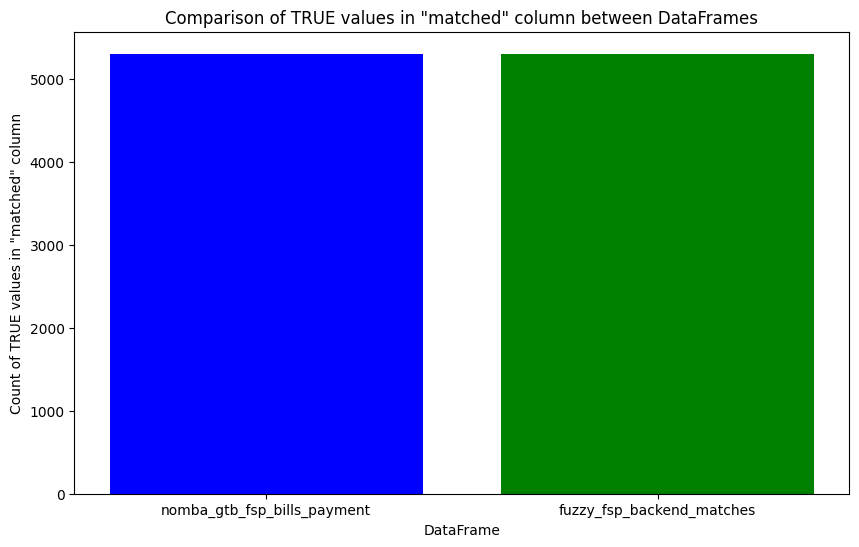

In [127]:
# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(df_counts['DataFrame'], df_counts['Count'], color=['blue', 'green'])
plt.xlabel('DataFrame')
plt.ylabel('Count of TRUE values in "matched" column')
plt.title('Comparison of TRUE values in "matched" column between DataFrames')
plt.show()